<a href="https://colab.research.google.com/github/durva11chavan/news_sentiment/blob/main/sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
import nltk
nltk.download('all')
from nltk.corpus import stopwords

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

# **DATA PREPROCESSING**

In [ ]:
data = gc.open("sentiment_data").sheet1

In [ ]:
rows=data.get_all_values()
data=pd.DataFrame.from_records(rows[1:])

In [ ]:
data.rename(columns={0:'sentence',1:"sentiment"},inplace = True)

In [ ]:
columns = data.sentiment.value_counts()

In [ ]:
columns

neutral     3130
positive    1852
negative     860
Name: sentiment, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

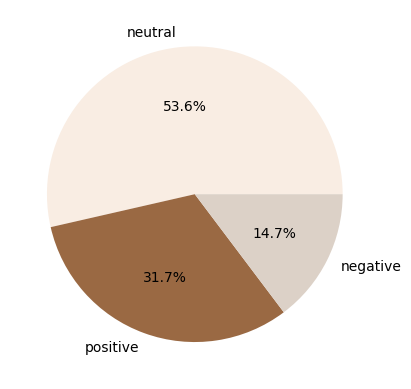

In [ ]:
plt.pie(columns,labels=columns.index,autopct='%1.1f%%', colors=["#F9EDE3","#9A6943","#DCD1C7"])
plt.show()

In [ ]:

positive = data[data.sentiment == 'positive']
negative = data[data.sentiment == 'negative']
neutral= data[data.sentiment == 'neutral']

In [ ]:
neutral

,sentence,sentiment
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
9,The Stockmann department store will have a tot...,neutral
13,Viking Line has canceled some services .,neutral
14,Ahlstrom Corporation STOCK EXCHANGE ANNOUNCEME...,neutral
...,...,...
5833,"In 2008 , Kemira recorded revenue of approxima...",neutral
5834,Investments in product development stood at 6....,neutral
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral


In [ ]:
stop = stopwords.words("english")

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
lem = WordNetLemmatizer()

In [ ]:
def words(dataframes):
  dic = {}
  for x in dataframes:
    x = re.sub(r'[^\w\s]', '', x)
    for word in word_tokenize(x):
      word=lem.lemmatize(word)
      if word not in stop:
        if word not in dic.keys():
          dic[word] = 1
        else:
          dic[word] += 1
  return dic

In [ ]:
pos_words=words(positive.sentence)
neg_words=words(negative.sentence)
n_words=words(neutral.sentence)

In [ ]:
pos_words=pd.DataFrame({'word':pos_words.keys(),'freq':pos_words.values()})
neg_words=pd.DataFrame({'word':neg_words.keys(),'freq':neg_words.values()})
n_words=pd.DataFrame({'word':n_words.keys(),'freq':n_words.values()})

In [ ]:
print(len(pos_words),len(neg_words),len(n_words))

words=list(n_words.word)
for x in neg_words.word:
  if x not in words:
    words.append(x)
for x in pos_words.word:
  if x not in words:
    words.append(x)

6839 3731 9232


In [ ]:
len(words)

13535

In [ ]:
pos_words=pos_words[pos_words.freq > 15]
neg_words=neg_words[neg_words.freq > 15]
n_words=n_words[n_words.freq > 15]

In [ ]:
print(len(pos_words),len(neg_words),len(n_words))

217 72 467


In [ ]:
pos_words=pos_words.sort_values(by = ['freq'], ascending = False)
neg_words=neg_words.sort_values(by = ['freq'], ascending = False)
n_words=n_words.sort_values(by = ['freq'], ascending = False)

In [ ]:
from wordcloud import WordCloud

In [ ]:
for x in neg_words.word:
  if x in pos_words.word and x in n_words.word:
    pos_words.drop(x, inplace = True)
    neg_words.drop(x, inplace = True)
    n_words.drop(x, inplace = True)

In [ ]:
print(len(pos_words),len(neg_words),len(n_words))

217 72 467


In [ ]:
def word_cloud(data):
  data=data[:50]
  word_freq = dict(zip(data['word'], data['freq']))
  wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_freq)
 
  # plot the WordCloud image                      
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
 
  plt.show()

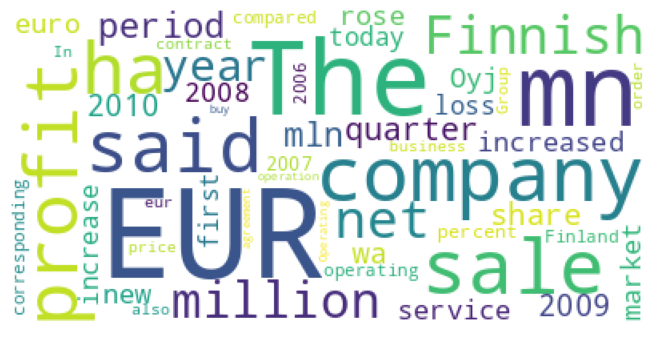

In [ ]:
word_cloud(pos_words)

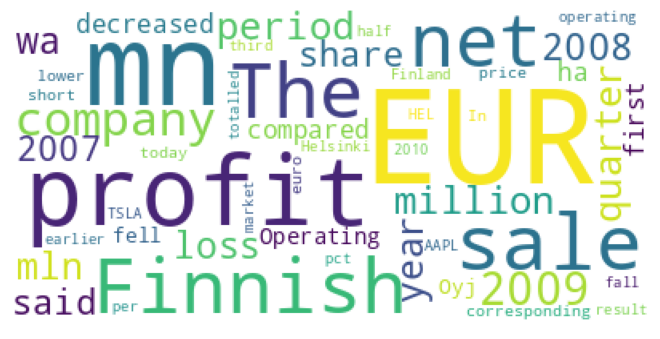

In [ ]:
word_cloud(neg_words)

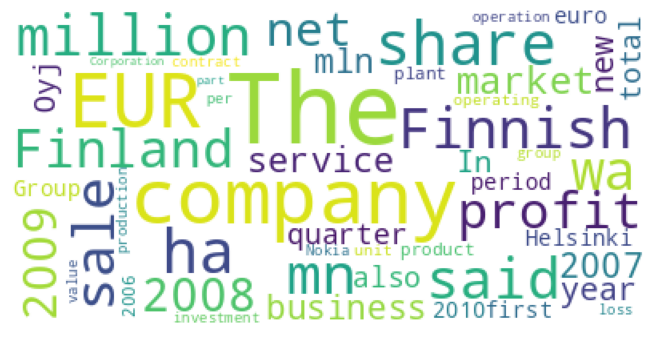

In [ ]:
word_cloud(n_words)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data.sentiment = le.fit_transform(data.sentiment)
df=data

In [ ]:
df

,sentence,sentiment
0,The GeoSolutions technology will leverage Bene...,2
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0
2,"For the last quarter of 2010 , Componenta 's n...",2
3,According to the Finnish-Russian Chamber of Co...,1
4,The Swedish buyout firm has sold its remaining...,1
...,...,...
5837,RISING costs have forced packaging producer Hu...,0
5838,Nordic Walking was first used as a summer trai...,1
5839,"According shipping company Viking Line , the E...",1
5840,"In the building and home improvement trade , s...",1


In [ ]:
data=df

In [ ]:
data

,sentence,sentiment
0,The GeoSolutions technology will leverage Bene...,2
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0
2,"For the last quarter of 2010 , Componenta 's n...",2
3,According to the Finnish-Russian Chamber of Co...,1
4,The Swedish buyout firm has sold its remaining...,1
...,...,...
5837,RISING costs have forced packaging producer Hu...,0
5838,Nordic Walking was first used as a summer trai...,1
5839,"According shipping company Viking Line , the E...",1
5840,"In the building and home improvement trade , s...",1


In [ ]:
for x in pos_words.word:
    data[x] = data.sentence.apply(lambda y: 1 if x in y else 0)
for x in neg_words.word:
    data[x] = data.sentence.apply(lambda y: 1 if x in y else 0)
for x in n_words.word:
    data[x] = data.sentence.apply(lambda y: 1 if x in y else 0)

<ipython-input-33-8e0145ca58d5>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[x] = data.sentence.apply(lambda y: 1 if x in y else 0)
<ipython-input-33-8e0145ca58d5>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[x] = data.sentence.apply(lambda y: 1 if x in y else 0)
<ipython-input-33-8e0145ca58d5>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. 

In [ ]:
data.shape

(5842, 529)

In [ ]:
data.head()

,sentence,sentiment,EUR,The,mn,company,sale,profit,said,ha,...,ALEXANDRIA,Va,house,trade,date,Friday,included,planned,31,estimate
0,The GeoSolutions technology will leverage Bene...,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"For the last quarter of 2010 , Componenta 's n...",2,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,According to the Finnish-Russian Chamber of Co...,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,The Swedish buyout firm has sold its remaining...,1,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
x_col=data.columns[2:]
x=data[x_col]
y=data['sentiment']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1, random_state=32)

CLASSIFICATION MODEL-SUPERVISED LEARNING


1. DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
dc=DecisionTreeClassifier()
model=dc.fit(x_train,y_train)


pred=model.predict(x_test)

print("Accuracy: ",metrics.accuracy_score(y_test,pred))
print("Precision: ",precision_score(y_test,pred,average = "weighted"))
print("Recall",recall_score(y_test,pred,average = "weighted"))

Accuracy:  0.5008547008547009
Precision:  0.5234592384498241
Recall 0.5008547008547009


2. RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
model=rf.fit(x_train,y_train)
pred=model.predict(x_test)
print("Accuracy: ",metrics.accuracy_score(y_test,pred))
print("Precision: ",precision_score(y_test,pred,average = "weighted"))
print("Recall",recall_score(y_test,pred,average = "weighted"))

Accuracy:  0.6273504273504273
Precision:  0.6041038917961219
Recall 0.6273504273504273


3. Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(n_estimators=100)
model=gb.fit(x_train,y_train)
pred=model.predict(x_test)
print("Accuracy: ",metrics.accuracy_score(y_test,pred))
print("Precision: ",precision_score(y_test,pred,average = "weighted"))
print("Recall",recall_score(y_test,pred,average = "weighted"))

Accuracy:  0.6341880341880342
Precision:  0.6139236849442535
Recall 0.6341880341880342


4.SVM

In [ ]:
from sklearn import svm
sm = svm.SVC(kernel='linear')
model = sm.fit(x_train,y_train)
pred=model.predict(x_test)
print("Accuracy: ",metrics.accuracy_score(y_test,pred))
print("Precision: ",precision_score(y_test,pred,average = "weighted"))
print("Recall",recall_score(y_test,pred,average = "weighted"))

Accuracy:  0.6683760683760683
Precision:  0.6447631389351892
Recall 0.6683760683760683


5. Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
model = nb.fit(x_train, y_train)
pred=model.predict(x_test)
print("Accuracy: ",metrics.accuracy_score(y_test,pred))
print("Precision: ",precision_score(y_test,pred,average = "weighted"))
print("Recall",recall_score(y_test,pred,average = "weighted"))

Accuracy:  0.6393162393162393
Precision:  0.6407668339889222
Recall 0.6393162393162393


6. KNN Model

In [ ]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier(n_neighbors=11)
model=knn.fit(x_train, y_train)
predi=model.predict(x_test)
print("Accuracy: ",metrics.accuracy_score(y_test,predi))
print("Precision: ",precision_score(y_test,predi,average = "weighted"))
print("Recall",recall_score(y_test,predi,average = "weighted"))

Accuracy:  0.5418803418803418
Precision:  0.5174170759691122
Recall 0.5418803418803418


7. Logistic Regression

In [ ]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
model= LogisticRegression()  
model.fit(x_train, y_train)   
pred= model.predict(x_test) 
print("Accuracy: ",metrics.accuracy_score(y_test,pred))
print("Precision: ",precision_score(y_test,pred,average = "weighted"))
print("Recall",recall_score(y_test,pred,average = "weighted"))


Accuracy:  0.67008547008547
Precision:  0.6548642274818488
Recall 0.67008547008547


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


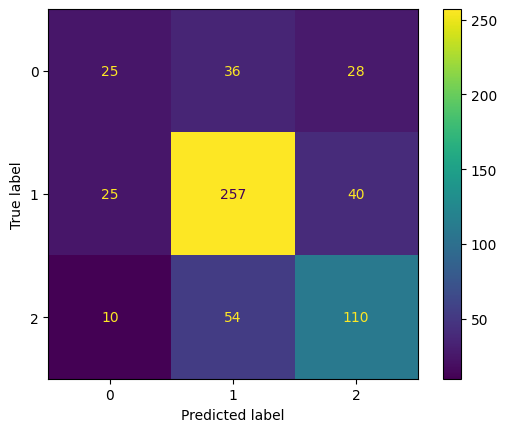

In [ ]:
from sklearn import metrics
confusion=metrics.confusion_matrix(y_test,pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = [0,1,2])
disp.plot()
plt.show()